In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [157]:
nba = pd.read_csv('nba-players-stats/Seasons_Stats.csv')
nba.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


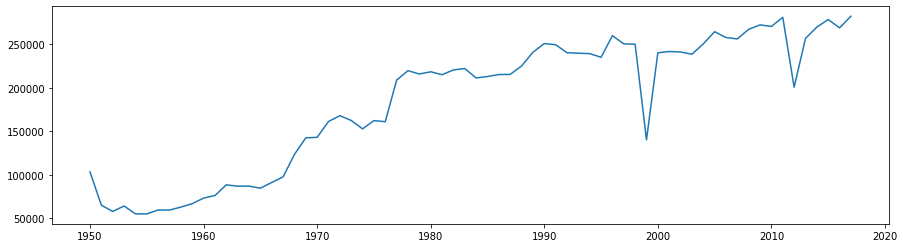

In [180]:
#Попробуем проанаоизировать как менялось общее количество заброшенных очков на протяжении времени. Для этого построим простой график 
nba_sum = nba.groupby('Year').PTS.sum().reset_index()
plt.figure(figsize=(15,4))
plt.plot(nba_sum.Year, nba_sum.PTS)

<BarContainer object of 10 artists>

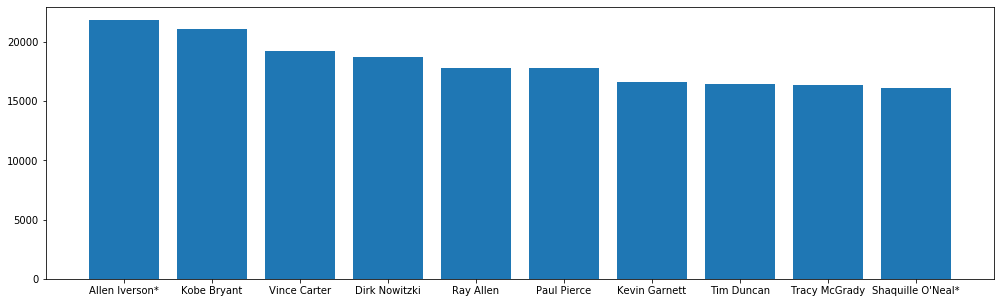

In [108]:
#Попробуем найти 10 игроков, которые забросили больше всех в сезоны с 2000 по 2010 и нарисуем для них bar chart.
nba = nba[(nba.Year >= 2000) & (nba.Year < 2010)]
nba_mvp = nba.groupby('Player').PTS.sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize=(17,5))
plt.bar(nba_mvp.Player, nba_mvp.PTS)


In [172]:
#Поскольку было выявлено выше, что Kobe Bryant и Allen Iverson забрасывали больше всего очков, попробуем посмотреть как менялся
# этот показатель на протяжении времени

kobe_vs_iverson = nba[(nba.Player =='Kobe Bryant') | (nba.Player =='Allen Iverson*')]
kobe_vs_iverson = kobe_vs_iverson[['Player', 'Year', 'PTS']]

kobe_vs_iverson = kobe_vs_iverson.groupby(['Player', 'Year'])['PTS'].sum().reset_index()
pivoted = kobe_vs_iverson.pivot(columns='Player', index='Year',values='PTS').reset_index()

trace0 = go.Scatter(
    x=pivoted.Year,
    y=pivoted['Kobe Bryant'],
    name='Kobe Bryant'
)

trace1 = go.Scatter(
    x=pivoted.Year,
    y=pivoted['Allen Iverson*'],
    name='Allen Iverson*'
)
  
data = [trace0, trace1]
layout = {'title': 'Kobe vs Iverson'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)



In [137]:
students = pd.read_csv('StudentsPerformance.csv')
students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


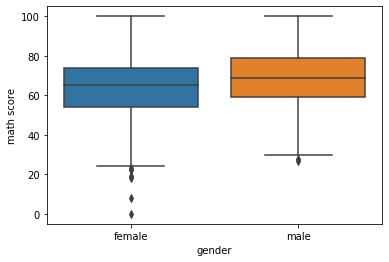

In [151]:
#Попробуем посмотреть как отличаются оценки по математике у мальчиков и девочек. Для этого посмтроим диаграмму размаха
sns.boxplot(data=students, x='gender', y='math score')

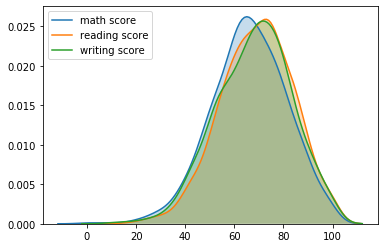

In [144]:
#Попробуем взять данные с оценками по всем трем напрвлениям и посмотрим какие есть отличия в их распределении (график KDE)
sns.kdeplot(students['math score'], shade=True)
sns.kdeplot(students['reading score'], shade=True)
sns.kdeplot(students['writing score'], shade=True)
plt.legend()
